In [8]:
import pandas as pd
from functools import reduce

# Define the function to load, clean, and trim the data
def load_clean_trim_data(file_name, start_date='1956-01-01'):
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'])
    # Convert all columns except 'DATE' to numeric, setting errors='coerce' will convert non-convertible values to NaN
    for col in df.columns:
        if col != 'DATE':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    # Trim the data to start from January 1956
    df = df[df['DATE'] >= pd.to_datetime(start_date)]
    return df

# File names
file_names = ["Consumer_sentiment.csv", "CPI.csv", "Industrial_production.csv", 
              "PPI.csv", "Real_GDP.csv", "Unemployment_rate.csv"]

# Load, clean, and trim data
data_frames = [load_clean_trim_data(file) for file in file_names]

# Merge all dataframes on the 'DATE' column
df_merged = reduce(lambda left, right: pd.merge(left, right, on='DATE', how='outer'), data_frames)

# Set 'DATE' as the index and resample to a semi-annual frequency
df_merged['DATE'] = pd.to_datetime(df_merged['DATE'])
df_merged.set_index('DATE', inplace=True)
df_semi_annual = df_merged.resample('6M', label='right', closed='right').mean()

# Display the first few rows to check
print(df_semi_annual.head())


            UMCSENT  CPALTT01USM657N     INDPRO     PPIACO      GDPC1  \
DATE                                                                    
1956-01-31      NaN         0.000000  21.450800  29.700000  3117.9220   
1956-07-31    98.20         0.370153  21.105883  30.100000  3142.2840   
1957-01-31   100.05         0.121656  21.764467  30.683333  3202.7905   
1957-07-31    92.90         0.418392  21.957117  31.083333  3221.6780   
1958-01-31    83.70         0.176264  21.137233  31.350000  3162.3090   

              UNRATE  
DATE                  
1956-01-31  4.000000  
1956-07-31  4.183333  
1957-01-31  4.100000  
1957-07-31  4.016667  
1958-01-31  4.850000  


In [11]:
df_semi_annual

,UMCSENT,CPALTT01USM657N,INDPRO,PPIACO,GDPC1,UNRATE
DATE,,,,,,
1956-01-31,NaN,0.000000,21.450800,29.700000,3117.9220,4.000000
1956-07-31,98.200000,0.370153,21.105883,30.100000,3142.2840,4.183333
1957-01-31,100.050000,0.121656,21.764467,30.683333,3202.7905,4.100000
1957-07-31,92.900000,0.418392,21.957117,31.083333,3221.6780,4.016667
1958-01-31,83.700000,0.176264,21.137233,31.350000,3162.3090,4.850000
...,...,...,...,...,...,...
2022-07-31,57.883333,0.878490,102.710033,267.293333,21779.6470,3.633333
2023-01-31,59.683333,0.162802,102.971183,263.964333,22051.1550,3.533333
2023-07-31,64.550000,0.360112,102.878783,255.667333,22358.0210,3.550000


/var/folders/zj/xlmlml6x6c94hvvhbhqs91j80000gn/T/ipykernel_61056/2110776983.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_transformed['Real_GDP_pct_change'] = df_merged['GDPC1'].pct_change() * 100
/var/folders/zj/xlmlml6x6c94hvvhbhqs91j80000gn/T/ipykernel_61056/2110776983.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_transformed['Industrial_production_pct_change'] = df_merged['INDPRO'].pct_change() * 100
/var/folders/zj/xlmlml6x6c94hvvhbhqs91j80000gn/T/ipykernel_61056/2110776983.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future versi

            PPI_pct_change  Real_GDP_pct_change  \
DATE                                              
1956-01-01        0.336700             0.000000   
1956-02-01        0.336700             0.000000   
1956-03-01        0.335570             0.000000   
1956-04-01        0.668896             0.826576   
1956-05-01        0.664452             0.000000   

            Industrial_production_pct_change  Consumer_sentiment_diff  \
DATE                                                                    
1956-01-01                         -0.876890                      0.6   
1956-02-01                         -0.876890                      0.6   
1956-03-01                          0.000000                      0.6   
1956-04-01                          0.758605                      0.6   
1956-05-01                         -0.878454                      0.6   

            Unemployment_rate_diff   CPI_log  
DATE                                          
1956-01-01                    -0.1 -

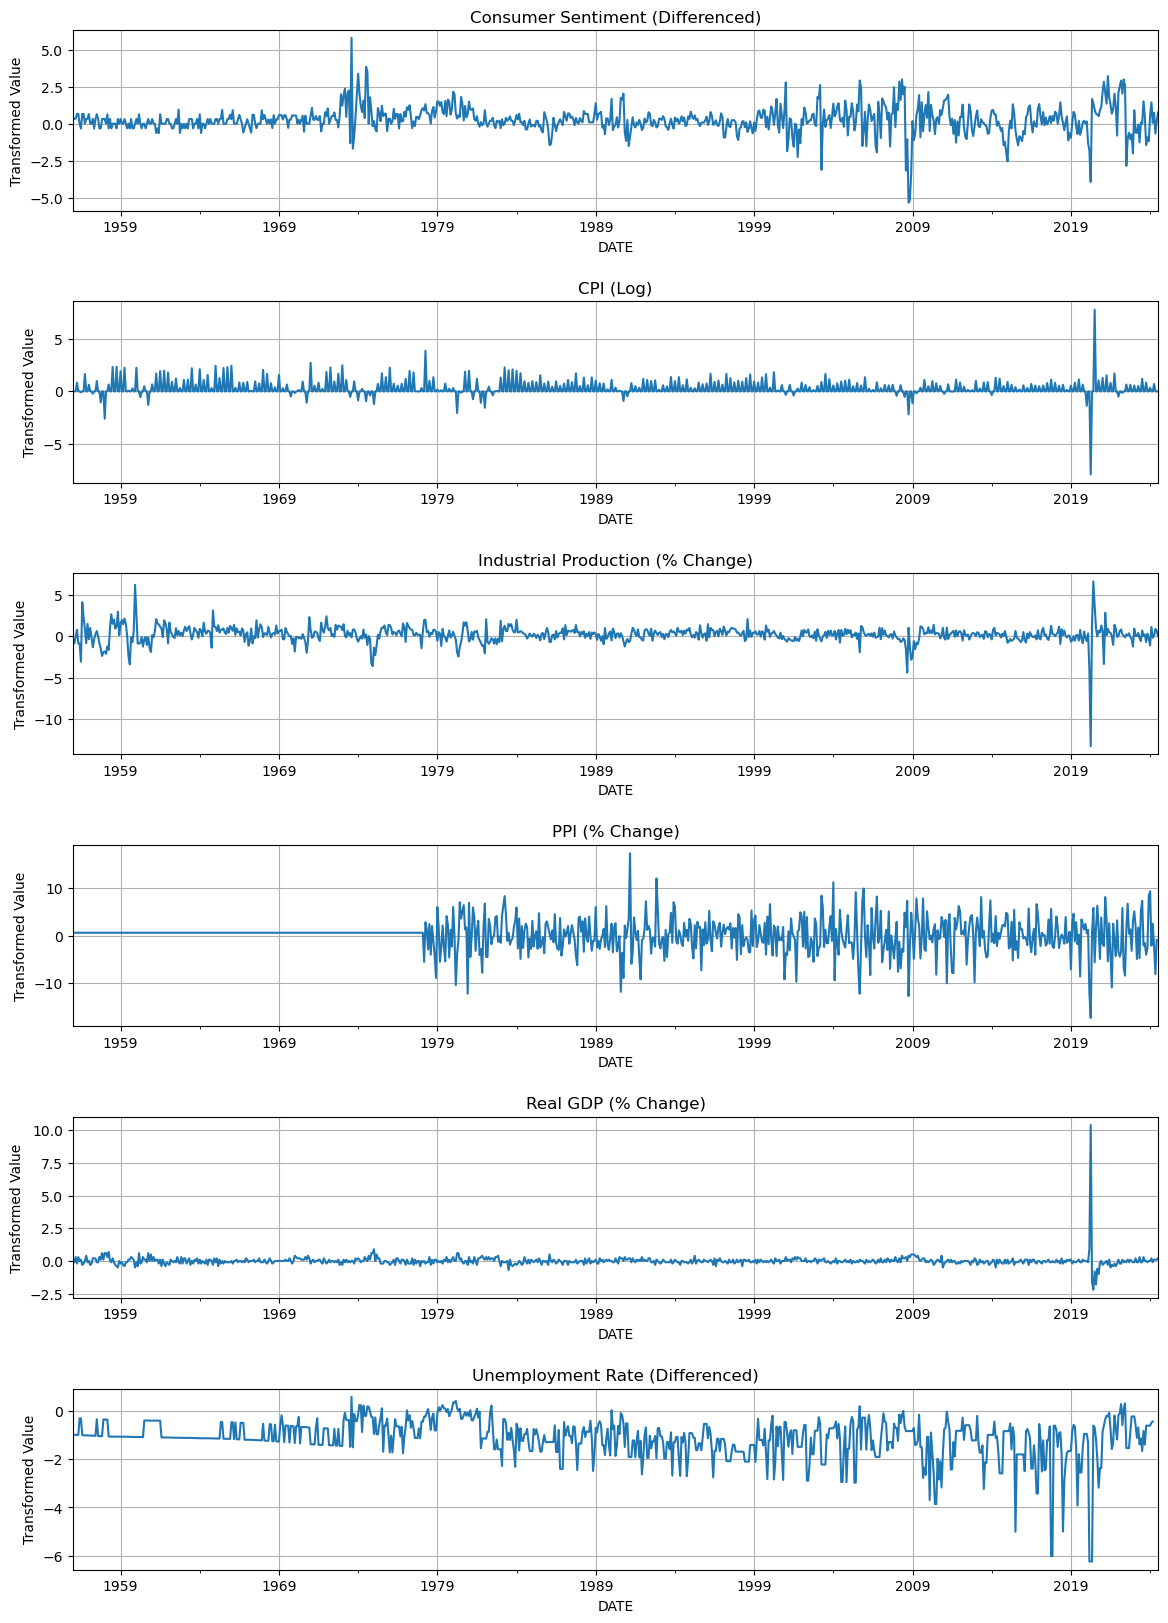

In [16]:
import numpy as np
import pandas as pd

# New DataFrame for transformed variables
df_transformed = pd.DataFrame(index=df_merged.index)

# Calculate percentage change for PPI, Real GDP, and Industrial Production
df_transformed['PPI_pct_change'] = df_merged['PPIACO'].pct_change() * 100
df_transformed['Real_GDP_pct_change'] = df_merged['GDPC1'].pct_change() * 100
df_transformed['Industrial_production_pct_change'] = df_merged['INDPRO'].pct_change() * 100

# Calculate differencing for Consumer Sentiment and Unemployment Rate
df_transformed['Consumer_sentiment_diff'] = df_merged['UMCSENT'].diff()
df_transformed['Unemployment_rate_diff'] = df_merged['UNRATE'].diff()

# Calculate log transformation for CPI with protection against zero
df_transformed['CPI_log'] = df_merged['CPALTT01USM657N'].replace(0, np.nan).apply(np.log)

# Handle NaN values from transformations (e.g., first differences or log of zero)
df_transformed.fillna(method='bfill', inplace=True)  # Backfill NaN values

# Print the head of the new DataFrame to check the transformations
print(df_transformed.head())

# Optionally, plot the transformed data to visualize the changes
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(14, 20))
fig.subplots_adjust(hspace=0.5)
titles = [
    "Consumer Sentiment (Differenced)",
    "CPI (Log)",
    "Industrial Production (% Change)",
    "PPI (% Change)",
    "Real GDP (% Change)",
    "Unemployment Rate (Differenced)"
]

for ax, (col, title) in zip(axes.flatten(), zip(df_transformed.columns, titles)):
    df_transformed[col].plot(ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Transformed Value')
    ax.grid(True)

plt.show()


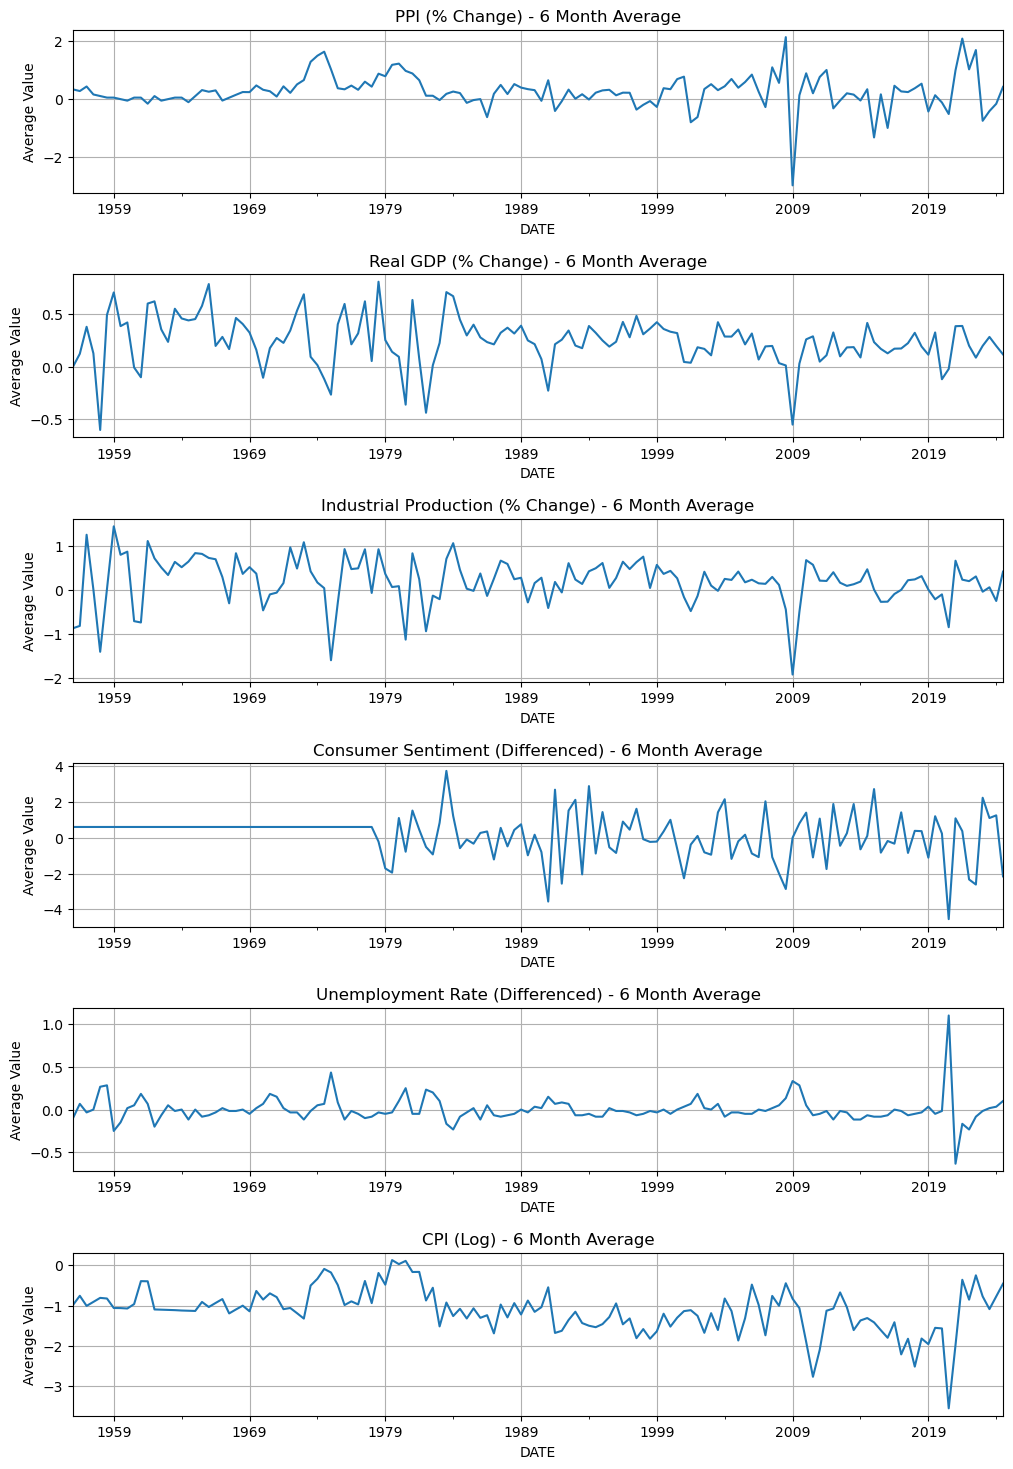

In [21]:
index = pd.date_range(start='1956-01-01', periods=10, freq='M')

# Resample to semi-annual frequency, taking the mean for the first and last 6 months of each year
df_semi_annual = df_transformed.resample('6M').mean()

# Plot the transformed data
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)

# Titles for each subplot
titles = [
    "PPI (% Change) - 6 Month Average",
    "Real GDP (% Change) - 6 Month Average",
    "Industrial Production (% Change) - 6 Month Average",
    "Consumer Sentiment (Differenced) - 6 Month Average",
    "Unemployment Rate (Differenced) - 6 Month Average",
    "CPI (Log) - 6 Month Average"
]

# Plot each column
for ax, (col, title) in zip(axes.flatten(), zip(df_semi_annual.columns, titles)):
    df_semi_annual[col].plot(ax=ax)
    ax.set_title(title)
    ax.set_ylabel('Average Value')
    ax.grid(True)

plt.show()


In [25]:
df_semi_annual

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log
DATE,,,,,,
1956-01-31,0.336700,0.000000,-0.876890,0.600000,-0.100000,-0.985817
1956-07-31,0.279264,0.122812,-0.824656,0.600000,0.066667,-0.759097
1957-01-31,0.437005,0.381030,1.248267,0.600000,-0.033333,-1.009166
1957-07-31,0.161117,0.126797,0.002784,0.600000,0.000000,-0.908705
1958-01-31,0.106667,-0.605074,-1.412863,0.600000,0.266667,-0.810403
...,...,...,...,...,...,...
2022-07-31,1.695742,0.086224,0.300574,-2.616667,-0.083333,-0.251060
2023-01-31,-0.747664,0.198634,-0.046881,2.233333,-0.016667,-0.774490
2023-07-31,-0.412532,0.284166,0.053413,1.100000,0.016667,-1.089336


In [28]:
df_semi_annual.index

DatetimeIndex(['1956-01-31', '1956-07-31', '1957-01-31', '1957-07-31',
               '1958-01-31', '1958-07-31', '1959-01-31', '1959-07-31',
               '1960-01-31', '1960-07-31',
               ...
               '2020-01-31', '2020-07-31', '2021-01-31', '2021-07-31',
               '2022-01-31', '2022-07-31', '2023-01-31', '2023-07-31',
               '2024-01-31', '2024-07-31'],
              dtype='datetime64[ns]', name='DATE', length=138, freq='6M')

In [29]:
df_semi_annual.columns

Index(['PPI_pct_change', 'Real_GDP_pct_change',
       'Industrial_production_pct_change', 'Consumer_sentiment_diff',
       'Unemployment_rate_diff', 'CPI_log'],
      dtype='object')

In [31]:
# Filter the DataFrame to include only data from 1979 and later
df_filtered = df_semi_annual[df_semi_annual.index >= '1979-01-01']

# Save the filtered DataFrame to a CSV file
df_filtered.to_csv('classification_data_set_post_1979.csv')

# Print the shape of the new DataFrame to confirm the filtering
print(f"The filtered DataFrame has {df_filtered.shape[0]} rows and {df_filtered.shape[1]} columns.")

The filtered DataFrame has 92 rows and 6 columns.


In [32]:
df_filtered

,PPI_pct_change,Real_GDP_pct_change,Industrial_production_pct_change,Consumer_sentiment_diff,Unemployment_rate_diff,CPI_log
DATE,,,,,,
1979-01-31,0.790351,0.253953,0.357287,-1.716667,-0.050000,-0.483261
1979-07-31,1.184527,0.141592,0.059564,-1.950000,-0.033333,0.127294
1980-01-31,1.226223,0.094103,0.078552,1.100000,0.100000,0.026845
1980-07-31,0.975820,-0.363215,-1.136191,-0.783333,0.250000,0.107403
1981-01-31,0.885733,0.637391,0.825620,1.516667,-0.050000,-0.168540
...,...,...,...,...,...,...
2022-07-31,1.695742,0.086224,0.300574,-2.616667,-0.083333,-0.251060
2023-01-31,-0.747664,0.198634,-0.046881,2.233333,-0.016667,-0.774490
2023-07-31,-0.412532,0.284166,0.053413,1.100000,0.016667,-1.089336
